<Body>   
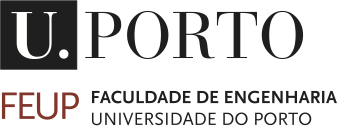   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Introduction</a></li>
    <li><a href="#ref2">Displaying a gray scale image</a></li>
    <li><a href="#ref3">Displaying a color image </a></li>
    <li><a href="#ref4">Converting images between different color models</a></li>
    <li><a href="#ref5">Showing Image Properties</a></li>
    <li><a href="#ref6">Accessing or Modifying pixel values</a></li>
    <li><a href="#ref7">Exercise about color segmentation</a></li>
</ol>
<p></p>
</div>
<hr>



<a id="ref1"></a>
# Introduction

Arrays in NumPy:

In [2]:
import numpy as np

img = np.ones((7, 4), dtype=np.uint8)
print(img)
print(img.dtype)
print(img.shape)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
uint8
(7, 4)


This creates a grayscale image with 7 rows and 3 columns.

Convert this image into **blue-green-red (BGR)**.

In [3]:
import cv2
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

print(img.shape)
print(img.dtype)
print(img)


(7, 4, 3)
uint8
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


**(!)** Each pixel is represented by a three-element array, with each integer representing one of the three color channels: B, G, and R.

**Loading the dependencies**

numpy, pandas, cv2, skimage, PIL, matplotlib

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display since cv2.imshow crashes the Colab
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import time

**Upload Images to Colaboratory**


1.   Download the folder "Data" on moodle to your PC.
2.   Create a new folder on your Colab session called "Data"  
3.   Load images to Colab from hard drive (using 'Load' option on the left)


Optionally, you can also consider the link for images that are available on web by using the command: 

```
wget 'directory'
```




_________


<a id="ref2"></a>
# Displaying a gray scale image:

In [ ]:
image_grey_cat = cv.imread("./Data/grey_cat.png", cv2.IMREAD_GRAYSCALE)  
cv2_imshow(image_grey_cat)

In [ ]:
# without the option "cv2.IMREAD_GRAYSCALE"
image_grey_cat = cv.imread("./Data/grey_cat.png")  
cv2_imshow(image_grey_cat)


> *Discuss this outcome.*

In [ ]:
image_grey_color = cv.imread("./Data/CRAS_2.jpeg", cv2.IMREAD_GRAYSCALE)  
cv2_imshow(image_grey_color)

> *Discuss this outcome.*

<a id="ref3"></a>
# Displaying a color image

In [ ]:
image_color = cv.imread("./Data/CRAS_2.jpeg")  
cv2_imshow(image_color)
print(image_color.shape)

In [ ]:
# with the option "cv2.IMREAD_REDUCED_COLOR_8"
image_color = cv.imread("./Data/CRAS_2.jpeg", cv2.IMREAD_REDUCED_COLOR_8)  
cv2_imshow(image_color)
print(image_color.shape)

### Displaying a color image from a website:

In [ ]:
!wget --quiet https://noticias.up.pt/wp-content/uploads/2020/02/feup-edificio-1240-827-768x506.jpg --output-document feup.jpg    

In [ ]:
image = cv.imread("feup.jpg")
cv2_imshow(image)

In [ ]:
image_BGR = cv.imread("feup.jpg")
image_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image_BGR, image_RGB))
cv2_imshow(final_frame)
print('\n')

> *Discuss this outcome.*

Please visit the webpage:
https://docs.opencv.org/4.5.3/d8/d01/group__imgproc__color__conversions.html

----
**Exercise 1:**  complete the following code to read and display several images (named 'CRAS')

In [ ]:
# Read and display all image from CRAS

# Create a list to store the urls of the images
urls = ["./Data/CRAS_2.jpeg",
        "./Data/CRAS_5.jpeg",
        "./Data/CRAS_7.jpeg"]   

# loop over the image URLs, you could store several image urls in the list
#...

____________

<a id="ref4"></a>
# Converting images between different color models

When we apply computer vision techniques to images, we will typically work with three kinds of color models: grayscale, blue-green-red (BGR), and hue-saturation-value (HSV).

**Grayscale** is a model that reduces color information by translating it into shades of gray or brightness. 

**BGR** is the blue-green-red color model, in which each pixel has a triplet of values representing the blue, green, and red components or channels of the pixel's color.

**HSV** uses a different triplet of channels. Hue is the color's tone, saturation is its intensity, and value represents its brightness.

By default, OpenCV uses the BGR color model (with 8 bits per channel) to represent any image that it loads from a file or captures from a camera.

Please see website:
https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html


In [ ]:
# load the original image and show it
image = cv.imread("./Data/CRAS_2.jpeg", cv.IMREAD_REDUCED_COLOR_8)
cv2_imshow(image)

# loop over each of the individual channels and display them
for (name, chan) in zip(("B-channel", "G-channel", "R-channel"), cv2.split(image)):
  print(name)
  cv2_imshow(chan)
	

In [ ]:
# show the original and grayscale versions of the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow("Original", image)
cv2_imshow("Grayscale", gray)

In [ ]:
# convert the image to the HSV color space and show it
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

# loop over each of the individual channels and display them
for (name, chan) in zip(("H-channel", "S-channel", "V-channel"), cv2.split(hsv)):
  print(name)
  cv2_imshow(chan)
  

## Random images (gray and color)

In [ ]:
import os
# Make an array of 120,000 random bytes.
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray  = np.array(randomByteArray)

# Convert the array to make a 400x300 grayscale image.
grayImage = flatNumpyArray.reshape(300, 400)
cv2_imshow(grayImage)

----
**Exercise 2:**  convert the array to make a 400x100 (3 channels) color image.

In [ ]:
#Convert the array to make a 400x100 color image.
# complete here....
# ....
# bgrImage = ... reshape(..., ..., 3) 

#using the cvtColor to obtain a 400x300 color image.
bgrImage2 = cv.cvtColor(grayImage, cv.COLOR_GRAY2BGR)
cv2_imshow(bgrImage2)

> *Discuss this outcome: the difference of  using rehape versus cvtColor*

------------------

## Saving images (gray and color) 
Files will be saved in the Colab session. You need to download these files otherwise they will be deleted after the session be terminated.

In [ ]:
cv2.imwrite('RandomColor.png', bgrImage)
cv2.imwrite('RandomGray.png', grayImage)

________


<a id="ref5"></a>
# Showing Image Properties


In [ ]:
import cv2
img = cv2.imread("./Data/grey_cat.png")

print(img.shape)
print(img.size)
print(img.dtype)

**shape:** This is a tuple describing the shape of the array. For an image, it contains the *height, width*, and — if the image is in color — the *number of channels*. 

**size**: This is the number of elements in the array. In the case of a grayscale image, this is the same as the number of pixels. In the case of a BGR image, it is three times the number of pixels because each pixel is represented by three elements (B, G, and R).

**dtype**: This is the datatype of the array's elements. For an 8-bit-perchannel image, the datatype is numpy.ui

Accessing Image Properties (number of rows, columns, and channels; type of image data; number of pixels )

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image_bgr.dtype)

#It returns a tuple of the number of rows, columns, and channels 
print(image_bgr.shape)

# Check the height of image 
print(image_bgr.shape[0])
# Check the width of image 
print(image_bgr.shape[1])
# Check the number of channels of the image
print(image_bgr.shape[2])


#Total number of pixels is accessed by img.size:
print( image_bgr.size )


<a id="ref6"></a>
# Accessing or Modifying pixel values

## Acessing pixels

In [ ]:
# For grayscale image, it returns the intensity value.
img_grey = cv.imread("./Data/grey_cat.png", cv.IMREAD_GRAYSCALE)
px = img_grey[100,100]
print(px)



# For BGR image, it returns an array of Blue, Green, Red values.
image_bgr = cv.imread("./Data/CRAS_2.jpeg", cv.IMREAD_REDUCED_COLOR_8)
px = image_bgr[100,100]
print(px)


195
[142  94  52]


In [ ]:
# accessing only blue pixel
blue = image_bgr[100,100,0]
print(blue)

# accessing only green pixel
green = image_bgr[100,100,1]
print(green)

# accessing only green pixel
red = image_bgr[100,100,2]
print(red)


255
0
255


## Modifying the pixels

In [ ]:
# Modifying the pixel values
image_bgr[100,100] = [255,255,255]

# Modifying the green channel
image_bgr[:, :, 1] = 0

cv2_imshow(image_bgr)


The program takes all pixels from all rows and columns and set the green value (at index one of the three-element BGR array) to 0.

> *Discuss this outcome.*


**(!)** The individual access of pixels **will be very slow**. When you need to manipulate an entire image or a large region of interest, it is advisable that you utilize
either OpenCV's functions or NumPy's array slicing. 

*   B, G, B values can be individually accessed by call **array.item()**
*   A more efficient approach to set/write pixels is to use the Numpy array methods such as **array.item()** and **array.itemset()** 



In [ ]:
# accessing RED value
print( image_bgr.item(10,10,2) )

# modifying RED value
image_bgr.itemset((10,10,2), 100)
print( image_bgr.item(10,10,2) )


255
100


----
**Example:** 

Comparing pixel access strategies

In [ ]:
###
###
### Option 1 (slower)
start = time.time() # starting time

for irow in range(0, image_bgr.shape[0]):      #rows
    for jcol in range(0, image_bgr.shape[1]):  #cols
      image_bgr[irow, jcol] = [255,255,255]

end = time.time() # ending time
print(f" Example 1: Runtime of the program is {end - start} seconds")

###
###
### Option 2 (faster)
start = time.time() # starting time

for irow in range(0, image_bgr.shape[0]):      #rows
    for jcol in range(0, image_bgr.shape[1]):  #cols
      image_bgr.itemset((irow, jcol,0), 255)
      image_bgr.itemset((irow, jcol,1), 255)
      image_bgr.itemset((irow, jcol,2), 255)

end = time.time() # ending time
print(f" Example 2: Runtime of the program is {end - start} seconds")


________________

It is also possible to define **regions of interests (ROI)**.

"*What happens in Vegas, **does not** stay in Vegas.*" Which means that, all operations perfomed to ROI will be also applied to the original image. 


In [ ]:
image_bgr = cv.imread("./Data/CRAS_2.jpeg", cv.IMREAD_REDUCED_COLOR_8)

#original image
print(image_bgr.shape)
cv2_imshow(image_bgr)

#define ROI
my_roi = image_bgr[50:100, 90:140]

# ROI
print(my_roi.shape)
cv2_imshow(my_roi)

# Clear pixels in ROI
my_roi[:, :, :] = 0
cv2_imshow(my_roi)

cv2_imshow(image_bgr)

<a id="ref7"></a>
# Exercises

## Color segmentation

Color spaces are surprisingly useful for image analysis. 

----
**Exercise 3:** 

**a)** develop a program that allows you to segment the buoy according to its color (orange).
> application notes: HSV, inRange, bitwise_and

**b)** extract the centroid of the blobs that represents the buoy
> application notes: image moments

**c)** extract the ROI of the buyo
> application notes: findContours, bondingRect, rectangle

**d)** change the color of the buoy to light green, rgb(0,255,0)
> application notes: np.zeros

Solution a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Import image
img_bgr = cv2.imread("./Data/CRAS_7.jpeg")


"  ************ RGB Color Space ************* "
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Image in RBG color space")
plt.show()


"  ************ HSV Color Space ************* "
# ....
# ....
light_orange = (1, 80, 190)
dark_orange = (10, 255, 255)


"  ************ Segmentation ************* "
# ....
# ....
#mask = 
#result = 


plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()



Solution b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
 
# Import image
img_bgr = cv2.imread("./Data/CRAS_7.jpeg")
 

"  ************ similar to a) ************* "
# ...
# ...


# Extract centroids
# cX = ... 
# cY = ...

cv2.circle(result, (cX, cY), 10, (255, 255, 255), -1)
cv2.putText(result, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2)

# print centroid (x, y-coordinates)
print((cX, cY))

#show image with centroid
cv2_imshow(result)


Solution c)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
 
# Import image
img_bgr = cv2.imread("./Data/CRAS_7.jpeg")
 
 
"  ************ similar do b) ************* "

# Find contours
# ....
# ....

print("Number of Contours found = " + str(len(contours)))

# Consider only contours with area higher than 20
for c in contours:
  if (cv2.contourArea(c) < 20):
    continue

  # ....
  # ...

"  ************ similar do b) ************* "

# print centroid (x, y-coordinates)
print((cX, cY))
 
#show image with centroid
cv2_imshow(result)


Solution d)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
 
# Import image
img_bgr = cv2.imread("./Data/CRAS_7.jpeg")
 
"  ************ similar do c) ************* "


 ----

 ## Histograms and Grayscale Transformations

 
 ----
**Exercise 4:** Image Histograms

**a)**  develop a program that negates a gray scale image

**b)** develop a program that calculates the histogram and equalizes a gray scale image ("grey_cat.png").
> application notes: Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.

> application notes: cv2.calcHist, cv2.equalizeHist

**c)** develop a program that calculates the histogram and equalizes a color image ("CRAS_7.jpeg").


See webpage:
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html




Solution a)

Solution b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
 
# Import gray image
img_gray = cv2.imread("./Data/grey_cat.png", cv2.IMREAD_GRAYSCALE)
 
# Equalizer
#img_equ = ...
  
# stacking images side-by-side
res_equalizer = np.hstack((img_gray, img_equ))
cv2_imshow(res_equalizer)

# Histograms of Original Image and Equalized Image
bins = np.linspace(0, 255, 255)
# ...
# ...

plt.legend(loc='upper right')
plt.show()

Solution c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
 
#
# Import color image
img_bgr = cv2.imread("./Data/CRAS_7.jpeg")
 
color = ('b','g','r')
for i, col in enumerate(color):
  # Histogram
  # histr = ...
  plt.plot(histr,color = col)
 
plt.xlim([0,256])
plt.show()
 

# Split img_bgr

array_img_equalized = []
for i, col in enumerate(color):
  print(i)
  # img_equ = ...
  array_img_equalized.append(img_equ)
  # histr   = ...
  plt.plot(histr,color = col)
 
plt.xlim([0,256])
plt.show()
 
# Merge  array_img_equalized
# img_color_equalized = ...
res_color_equalizer = np.hstack((img_bgr, img_color_equalized))
cv2_imshow(res_color_equalizer)

______________

# References
Learning OpenCV 4 Computer Vision with Python 3, 3rd edition, Joseph and Joe, Packt